In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


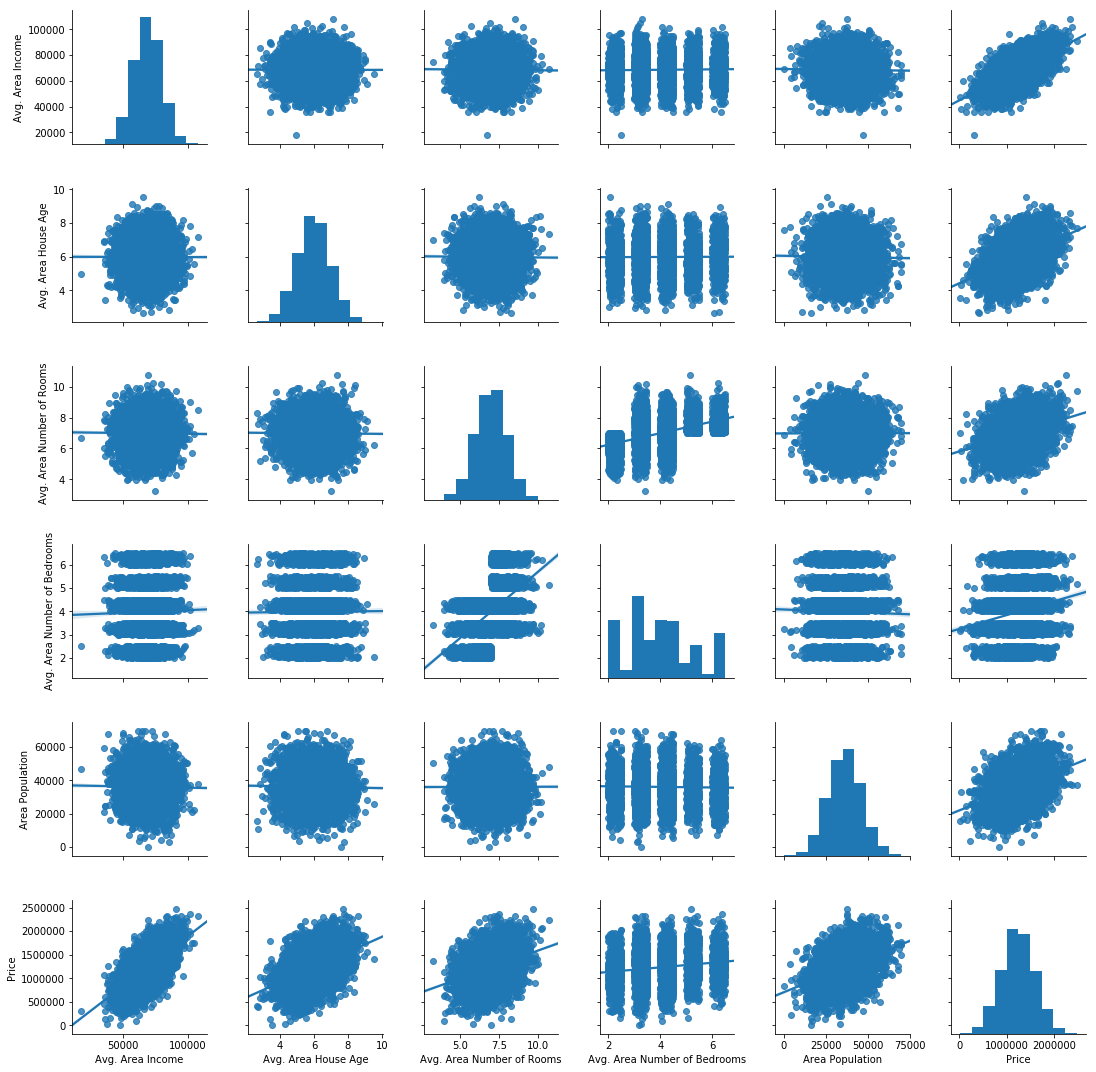

In [4]:
sns.pairplot(df,kind = 'reg')

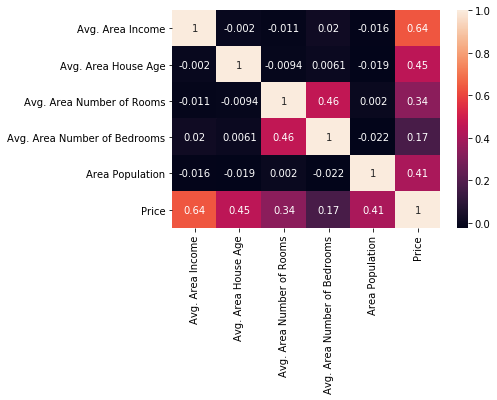

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']]
y = df['Price']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state= 150)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression().fit(x_train,y_train)

In [12]:
(100*model.score(x_test,y_test))

91.82649661049295

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
y_pred  = model.predict(x_test)

In [18]:
print(mean_absolute_error(y_test,y_pred))

82200.49931481684


In [19]:
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4827,64346.987500,5.790964,6.978865,32337.732861
1793,68561.660429,6.849179,7.869893,31796.758810
2957,78186.282937,5.500905,7.183912,28130.265919
4218,63445.864363,6.943529,7.852760,46462.313478
2188,62072.072554,4.431745,6.992438,23853.967810


In [20]:
y_test.head()

4827    9.591021e+05
1793    1.421519e+06
2957    1.348804e+06
4218    1.510884e+06
2188    5.499472e+05
Name: Price, dtype: float64

In [ ]:
pd.to_pickle(model,'Linear_Regression.pkl')